In [2]:
import pandas as pd
import numpy as np
import pickle
import os
from typing import List, Dict, Tuple, Union

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit, minimize, least_squares
from scipy.stats import norm

# Importing the normalizer from sklearn
from sklearn.preprocessing import MinMaxScaler

In [3]:

def calculate_U(density):
    return -2.494 * np.log(density)

def gaussian_distribution_part(x, a: float,b: float, c: float):
    return a * np.exp(-((x - b) / c) ** 2)

def gaussian_distribution_sum_(x, a: List[float], b: List[float], c: List[float]):
    return np.sum([gaussian_distribution_part(x, a[i], b[i], c[i]) for i in range(len(a))])

def gaussian_distribution_sum(x, *params):
    # Params = [a1, b1, c1, a2, b2, c2, ...]
    # Count the number of parameters
    n = len(params) // 3
    # Split the parameters into three lists
    a = params[:n]
    b = params[n:2 * n]
    c = params[2 * n:]
    return np.sum([gaussian_distribution_part(x, a[i], b[i], c[i]) for i in range(len(a))], axis=0)

In [33]:
angles_folder = 'data/angles'

# Load the bbb angles
df_bbb = pd.read_csv(os.path.join(angles_folder, 'bbb_angles.csv'))
df_bbb.head()

,angle
0,122.263460
1,129.511417
2,94.663653
3,89.728993
4,93.611595


In [6]:
def get_bins_U_norm(df: pd.DataFrame, bins: int = 100, value_col: str = 'angle') -> Tuple[np.ndarray, np.ndarray]:
    """
    Get the bins and the U values for a given dataframe
    :param df: The dataframe
    :param bins: The number of bins
    :param value_col: The column name of the values
    :return: The bins and the U values
    """
    # Get the angles
    angles = df[value_col].values
    # Get the histogram
    hist, bins = np.histogram(angles, bins=bins)
    # Get the bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2
    # Get the bin densities
    densities = hist / (len(angles) * (bins[1] - bins[0]))

    # Calculate the U values
    U = calculate_U(densities)

    # Scale the values
    U -= U.min()
    bin_centers -= bin_centers.mean()

    return bin_centers, U

In [25]:
bin_centers, U = get_bins_U_norm(df_bbb , bins=200)
for bin_center, u in zip(bin_centers, U):
    print(f'{bin_center:.2f} {u:.4f}')

-34.82 0.0009
-34.47 0.0006
-34.12 0.0006
-33.77 0.0012
-33.42 0.0010
-33.07 0.0010
-32.72 0.0017
-32.37 0.0022
-32.02 0.0025
-31.67 0.0031
-31.32 0.0033
-30.97 0.0032
-30.62 0.0043
-30.27 0.0052
-29.92 0.0066
-29.57 0.0093
-29.22 0.0083
-28.87 0.0111
-28.52 0.0134
-28.17 0.0180
-27.82 0.0191
-27.47 0.0238
-27.12 0.0272
-26.77 0.0298
-26.42 0.0344
-26.07 0.0390
-25.72 0.0471
-25.37 0.0533
-25.02 0.0552
-24.67 0.0569
-24.32 0.0634
-23.97 0.0610
-23.62 0.0574
-23.27 0.0631
-22.92 0.0603
-22.57 0.0557
-22.22 0.0496
-21.87 0.0464
-21.52 0.0443
-21.17 0.0402
-20.82 0.0379
-20.47 0.0335
-20.12 0.0319
-19.77 0.0328
-19.42 0.0278
-19.07 0.0249
-18.72 0.0253
-18.37 0.0222
-18.02 0.0198
-17.67 0.0180
-17.32 0.0191
-16.97 0.0163
-16.62 0.0168
-16.27 0.0159
-15.92 0.0167
-15.57 0.0156
-15.22 0.0136
-14.87 0.0132
-14.52 0.0122
-14.17 0.0112
-13.82 0.0105
-13.47 0.0102
-13.12 0.0107
-12.77 0.0096
-12.42 0.0109
-12.07 0.0103
-11.72 0.0107
-11.37 0.0089
-11.02 0.0093
-10.67 0.0098
-10.32 0.0103
-9.97 

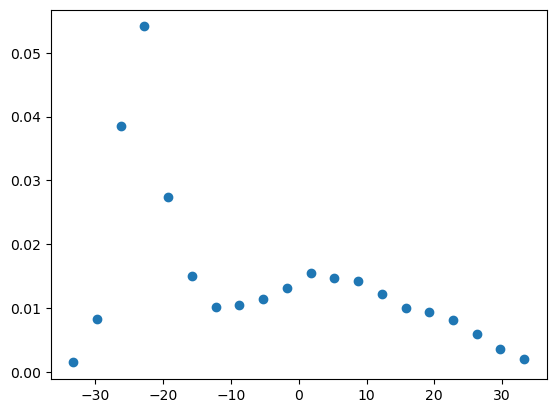

In [23]:
# Plot as a curve 
plt.plot(bin_centers, U, 'o')
plt.show()

In [27]:
a1_, a2_, a3_, a4_, a5_, a6_ = 307, -843, 24.8, -216, 198, 1110
b1_, b2_, b3_, b4_, b5_, b6_ = -1.5, 57.9, 104, 56.5, 225, 57.7
c1_, c2_, c3_, c4_, c5_, c6_ = 50.4, 25.8, 15.3, 18, 67.2, 24
p0 = (a1_, a2_, a3_, a4_, a5_, a6_), (b1_, b2_, b3_, b4_, b5_, b6_), (c1_, c2_, c3_, c4_, c5_, c6_)

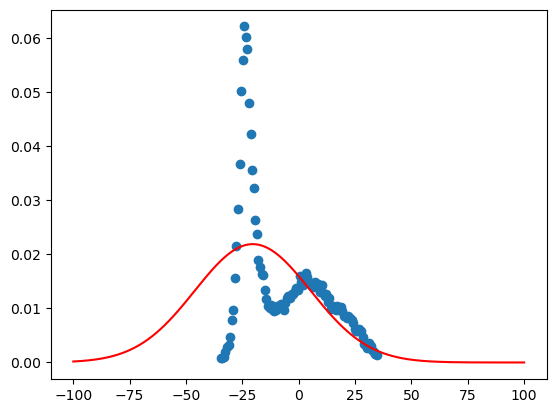

In [17]:
def func(x, a, b, c):
    return a * np.exp(-((x - b) / c) ** 2)

x = np.linspace(-100, 100, 1000)

# Fit the data
popt, pcov = curve_fit(func, bin_centers, U, p0=[a1_, b1_, c1_])

# Plot the data
plt.plot(bin_centers, U, 'o', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit')

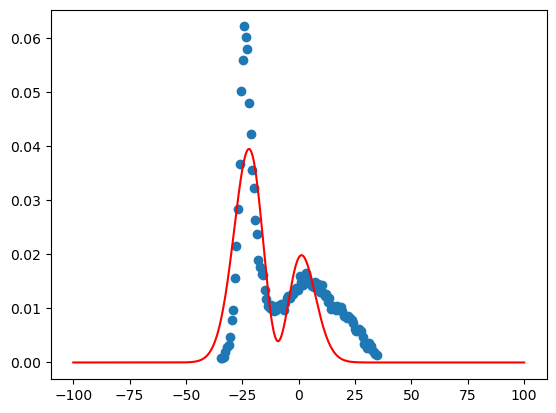

In [15]:
def func2(x, a1, b1, c1, a2, b2, c2):
    return a1 * np.exp(-((x - b1) / c1) ** 2) + a2 * np.exp(-((x - b2) / c2) ** 2)

# Fit the data
popt, pcov = curve_fit(func2, bin_centers, U, p0=[a1_, b1_, c1_, a2_, b2_, c2_])

# Plot the data
plt.plot(bin_centers, U, 'o', label='data')
plt.plot(x, func2(x, *popt), 'r-', label='fit')

/Users/marvinprakash/anaconda3/envs/bio/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


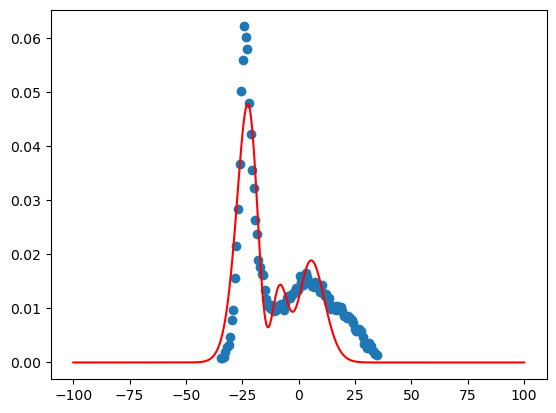

In [18]:
def func4(x, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4):
    return a1 * np.exp(-((x - b1) / c1) ** 2) + a2 * np.exp(-((x - b2) / c2) ** 2) + a3 * np.exp(-((x - b3) / c3) ** 2) + a4 * np.exp(-((x - b4) / c4) ** 2)

# Fit the data
popt, pcov = curve_fit(func4, bin_centers, U, p0=[a1_, b1_, c1_, a2_, b2_, c2_, a3_, b3_, c3_, a4_, b4_, c4_], maxfev=100000)

# Plot the data
plt.plot(bin_centers, U, 'o', label='data')
plt.plot(x, func4(x, *popt), 'r-', label='fit')


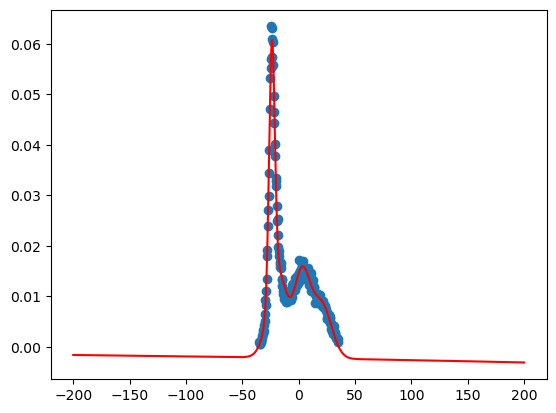

In [26]:
def func6(x, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5, a6, b6, c6):
    return a1 * np.exp(-((x - b1) / c1) ** 2) + a2 * np.exp(-((x - b2) / c2) ** 2) + a3 * np.exp(-((x - b3) / c3) ** 2) + a4 * np.exp(-((x - b4) / c4) ** 2) + a5 * np.exp(-((x - b5) / c5) ** 2) + a6 * np.exp(-((x - b6) / c6) ** 2)

# Fit the data
popt, pcov = curve_fit(func6, bin_centers, U, p0=[a1_, b1_, c1_, a2_, b2_, c2_, a3_, b3_, c3_, a4_, b4_, c4_, a5_, b5_, c5_, a6_, b6_, c6_], maxfev=100000)

# Plot the data
x = np.linspace(-200, 200, 10000)
plt.plot(bin_centers, U, 'o', label='data')
plt.plot(x, func6(x, *popt), 'r-', label='fit')


In [94]:
# Print the parameters]
print(f"a1 = {popt[0]:.4f}, b1 = {popt[1]:.4f}, c1 = {popt[2]:.4f}")
print(f"a2 = {popt[3]:.4f}, b2 = {popt[4]:.4f}, c2 = {popt[5]:.4f}")
print(f"a3 = {popt[6]:.4f}, b3 = {popt[7]:.4f}, c3 = {popt[8]:.4f}")
print(f"a4 = {popt[9]:.4f}, b4 = {popt[10]:.4f}, c4 = {popt[11]:.4f}")
print(f"a5 = {popt[12]:.4f}, b5 = {popt[13]:.4f}, c5 = {popt[14]:.4f}")
print(f"a6 = {popt[15]:.4f}, b6 = {popt[16]:.4f}, c6 = {popt[17]:.4f}")

a1 = 0.0499, b1 = -23.4662, c1 = 4.5513
a2 = -692.8801, b2 = 46.1679, c2 = 45.4531
a3 = -0.0077, b3 = 104.0001, c3 = -16742334.9939
a4 = -764.1537, b4 = 46.3903, c4 = 45.4812
a5 = -132581.5293, b5 = -53663.9336, c5 = -11153.6379
a6 = 1457.0315, b6 = 46.2845, c6 = 45.4688


In [28]:
# Make a function that tries out fitting with different numbers and returns the best fit

def fit_func(x, y, p0, maxfev=100000):
    # Initial params
    (a1_, a2_, a3_, a4_, a5_, a6_), (b1_, b2_, b3_, b4_, b5_, b6_), (c1_, c2_, c3_, c4_, c5_, c6_) = p0
    # Fit the data for 2 gaussians
    popt2, pcov2 = curve_fit(func2, x, y, p0=[a1_, b1_, c1_, a2_, b2_, c2_], maxfev=maxfev)

    # Fit the data for 4 gaussians
    popt4, pcov4 = curve_fit(func4, x, y, p0=[a1_, b1_, c1_, a2_, b2_, c2_, a3_, b3_, c3_, a4_, b4_, c4_], maxfev=maxfev)

    # Fit the data for 6 gaussians
    popt6, pcov6 = curve_fit(func6, x, y, p0=[a1_, b1_, c1_, a2_, b2_, c2_, a3_, b3_, c3_, a4_, b4_, c4_, a5_, b5_, c5_, a6_, b6_, c6_], maxfev=maxfev)

    return popt2, popt4, popt6

popt2, popt4, popt6 = fit_func(bin_centers, U, p0)

/Users/marvinprakash/anaconda3/envs/bio/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, '6 Gaussians')

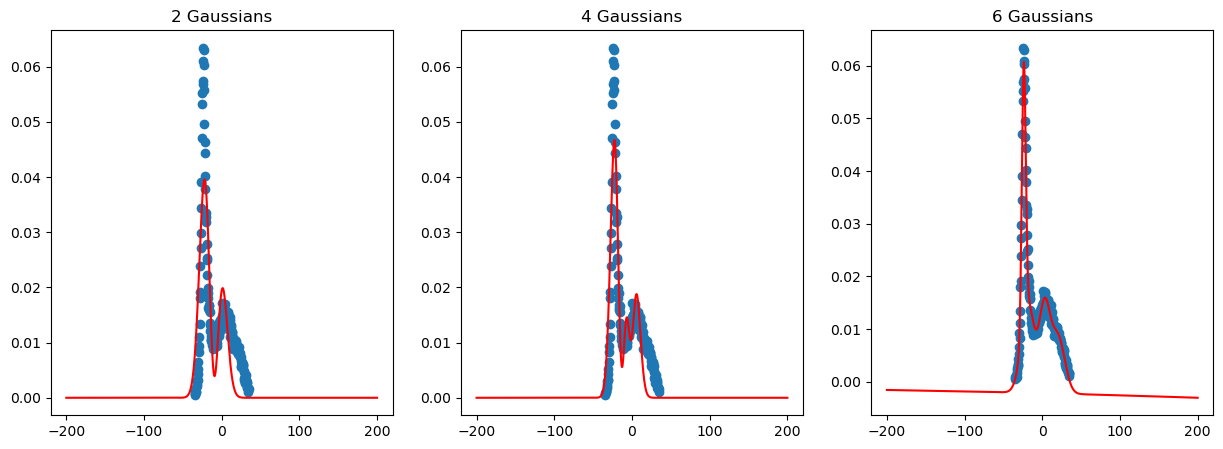

In [30]:
# Plot the data in 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(bin_centers, U, 'o', label='data')
ax1.plot(x, func2(x, *popt2), 'r-', label='fit')
ax1.set_title('2 Gaussians')

ax2.plot(bin_centers, U, 'o', label='data')
ax2.plot(x, func4(x, *popt4), 'r-', label='fit')
ax2.set_title('4 Gaussians')

ax3.plot(bin_centers, U, 'o', label='data')
ax3.plot(x, func6(x, *popt6), 'r-', label='fit')
ax3.set_title('6 Gaussians')

plt.show()


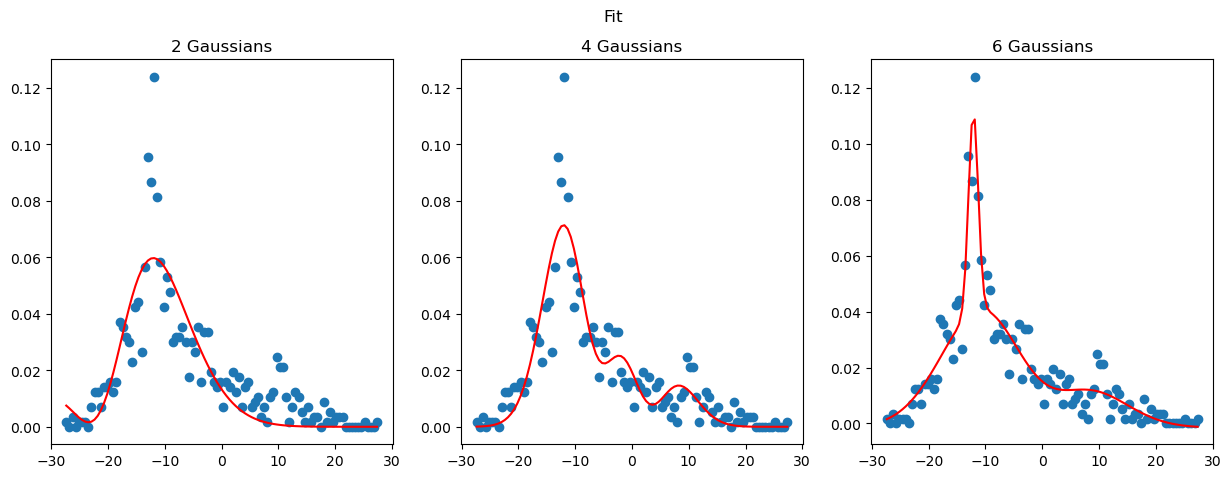

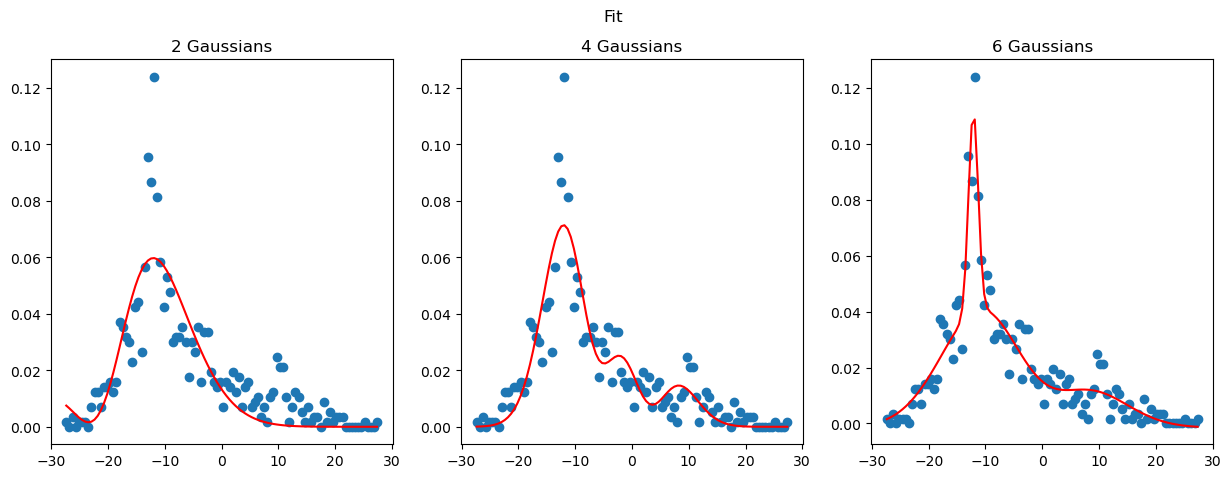

In [55]:
# Convert to function
def plot_fit(x, y, p0, maxfev=1000000, plot_title='Fit'):
    popt2, popt4, popt6 = fit_func(x, y, p0, maxfev=maxfev)

    # Plot the data in 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.plot(x, y, 'o', label='data')
    ax1.plot(x, func2(x, *popt2), 'r-', label='fit')
    ax1.set_title('2 Gaussians')

    ax2.plot(x, y, 'o', label='data')
    ax2.plot(x, func4(x, *popt4), 'r-', label='fit')
    ax2.set_title('4 Gaussians')

    ax3.plot(x, y, 'o', label='data')
    ax3.plot(x, func6(x, *popt6), 'r-', label='fit')
    ax3.set_title('6 Gaussians')

    # Set the title
    fig.suptitle(plot_title)

    # Return the plot
    return fig

plot_fit(bin_centers, U, p0)

In [38]:
# Load bbs_angle df
df_bbs = pd.read_csv(os.path.join(angles_folder, 'bbs_angles.csv'))
df_bbs.head()

,angle,residue
0,21.561235,PHE
1,22.128675,LYS
2,9.578320,ILE
3,21.444522,LYS
4,18.272978,LYS


In [39]:
bin_centers, U = get_bins_U_norm(df_bbs, 100)

/var/folders/yb/qgjkd6mj4v73bglk6kjb929m0000gn/T/ipykernel_96457/3318043070.py:2: RuntimeWarning: divide by zero encountered in log
  return -2.494 * np.log(density)


In [40]:
for bin_center, u in zip(bin_centers, U):
    print(f"{bin_center:.4f}, {u:.4f}")

-31.0565, 0.0002
-30.4291, 0.0005
-29.8016, 0.0003
-29.1742, 0.0005
-28.5468, 0.0013
-27.9194, 0.0011
-27.2920, 0.0009
-26.6646, 0.0017
-26.0372, 0.0022
-25.4098, 0.0030
-24.7824, 0.0039
-24.1550, 0.0044
-23.5276, 0.0059
-22.9002, 0.0084
-22.2728, 0.0094
-21.6454, 0.0111
-21.0180, 0.0126
-20.3906, 0.0123
-19.7632, 0.0136
-19.1358, 0.0149
-18.5084, 0.0230
-17.8810, 0.0235
-17.2536, 0.0296
-16.6262, 0.0295
-15.9988, 0.0381
-15.3714, 0.0449
-14.7440, 0.0467
-14.1166, 0.0516
-13.4892, 0.0650
-12.8618, 0.0918
-12.2344, 0.0780
-11.6070, 0.0677
-10.9796, 0.0653
-10.3522, 0.0569
-9.7247, 0.0521
-9.0973, 0.0453
-8.4699, 0.0372
-7.8425, 0.0372
-7.2151, 0.0361
-6.5877, 0.0341
-5.9603, 0.0350
-5.3329, 0.0293
-4.7055, 0.0242
-4.0781, 0.0218
-3.4507, 0.0230
-2.8233, 0.0234
-2.1959, 0.0210
-1.5685, 0.0213
-0.9411, 0.0193
-0.3137, 0.0175
0.3137, 0.0175
0.9411, 0.0158
1.5685, 0.0160
2.1959, 0.0185
2.8233, 0.0166
3.4507, 0.0136
4.0781, 0.0113
4.7055, 0.0125
5.3329, 0.0092
5.9603, 0.0099
6.5877, 0.0099
7

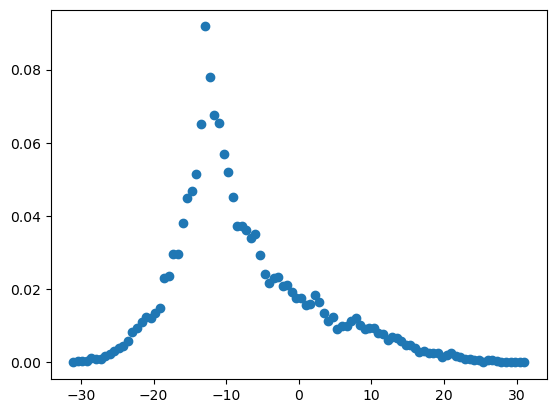

In [41]:
# Plot the data
plt.plot(bin_centers, U, 'o', label='data')

/Users/marvinprakash/anaconda3/envs/bio/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


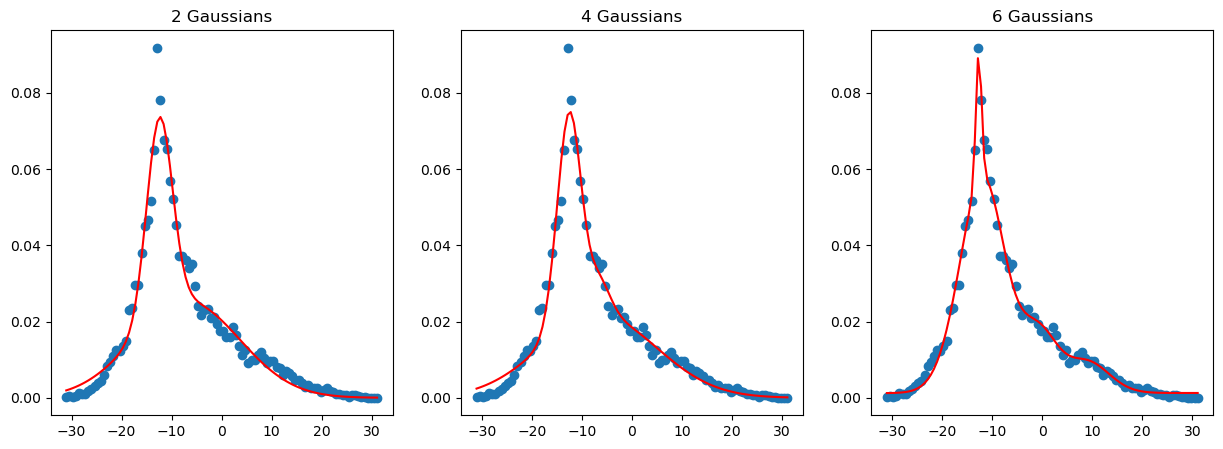

In [42]:
plot_fit(bin_centers, U, p0)

PHE


/var/folders/yb/qgjkd6mj4v73bglk6kjb929m0000gn/T/ipykernel_96457/3318043070.py:2: RuntimeWarning: divide by zero encountered in log
  return -2.494 * np.log(density)


LYS
ILE
GLU
ARG
TRP
GLN
TYR
MET
HIS


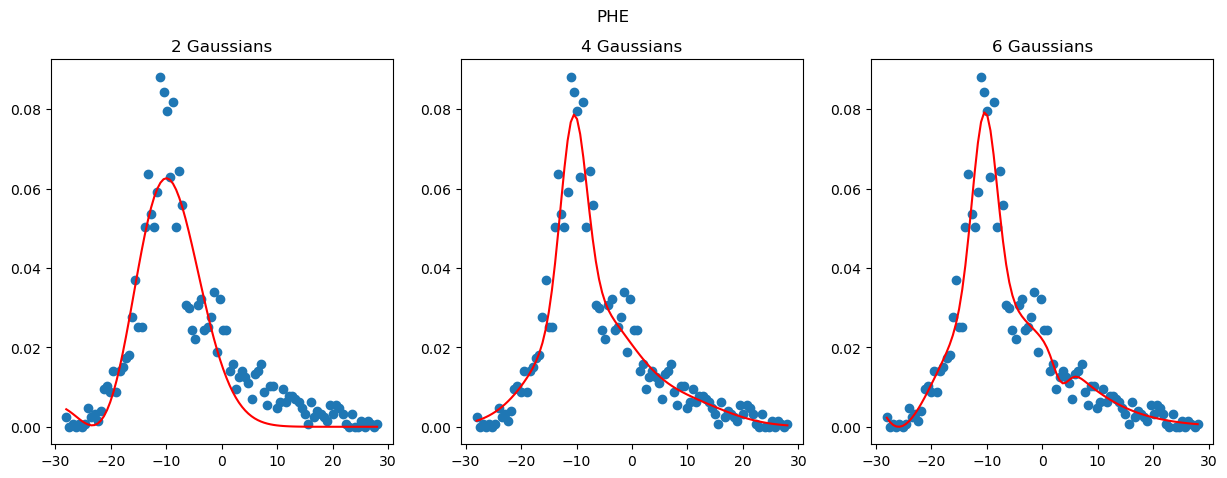

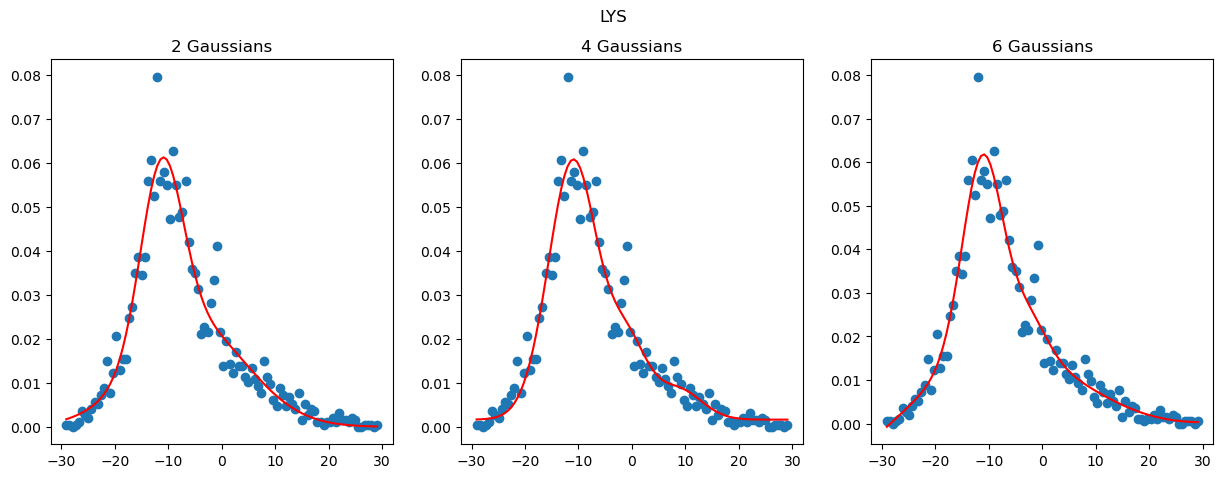

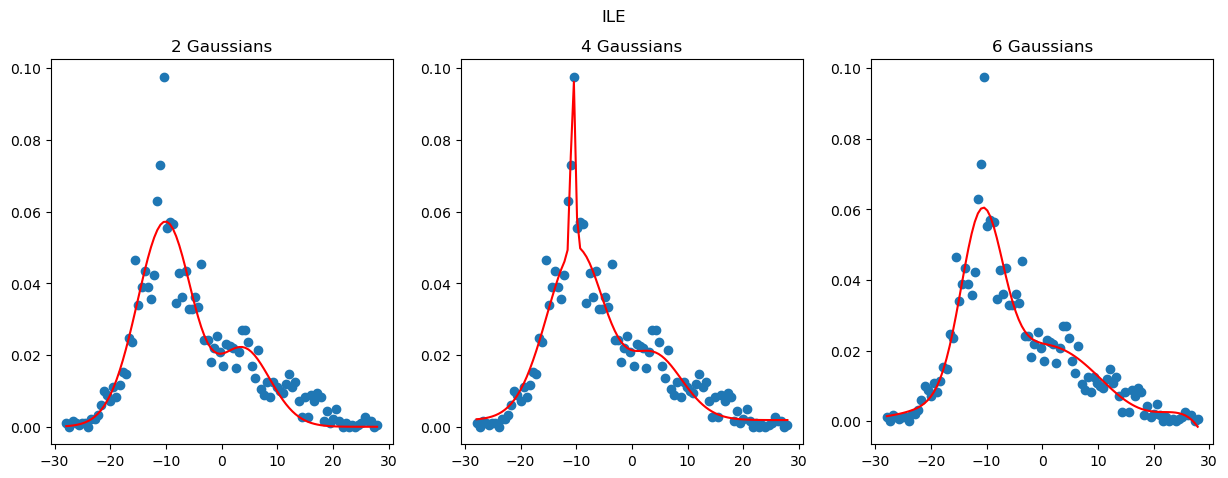

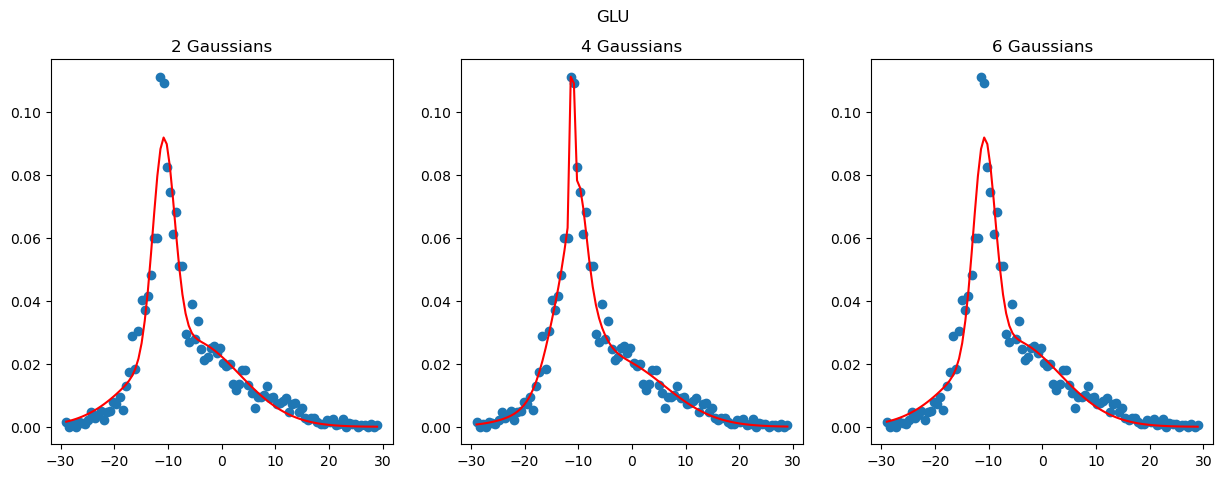

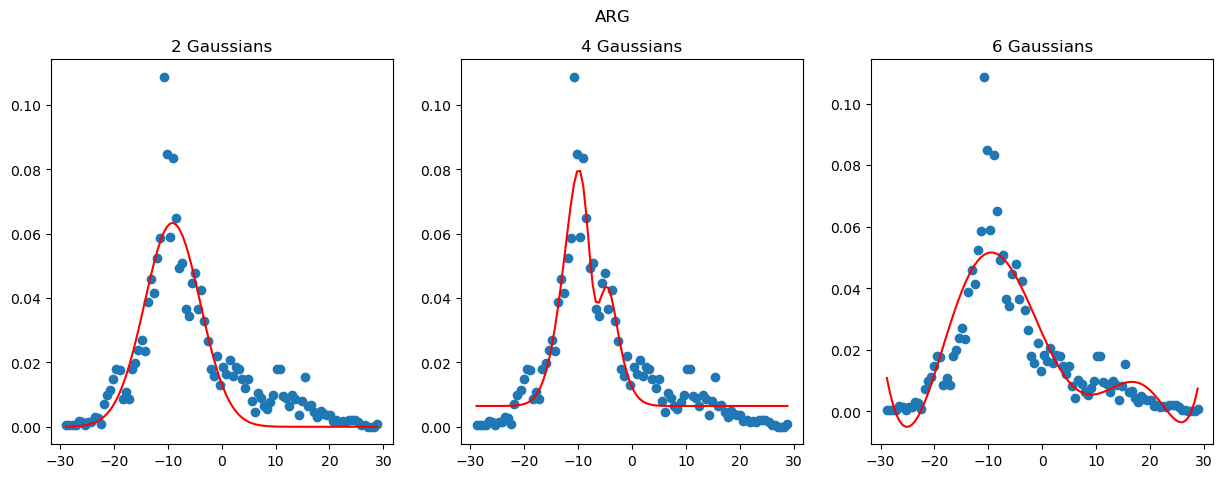

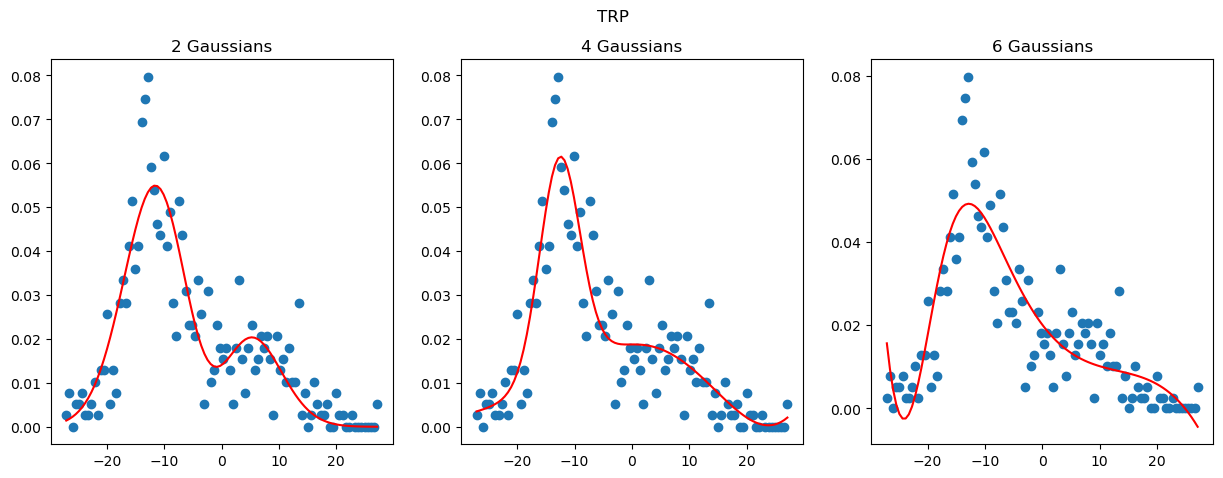

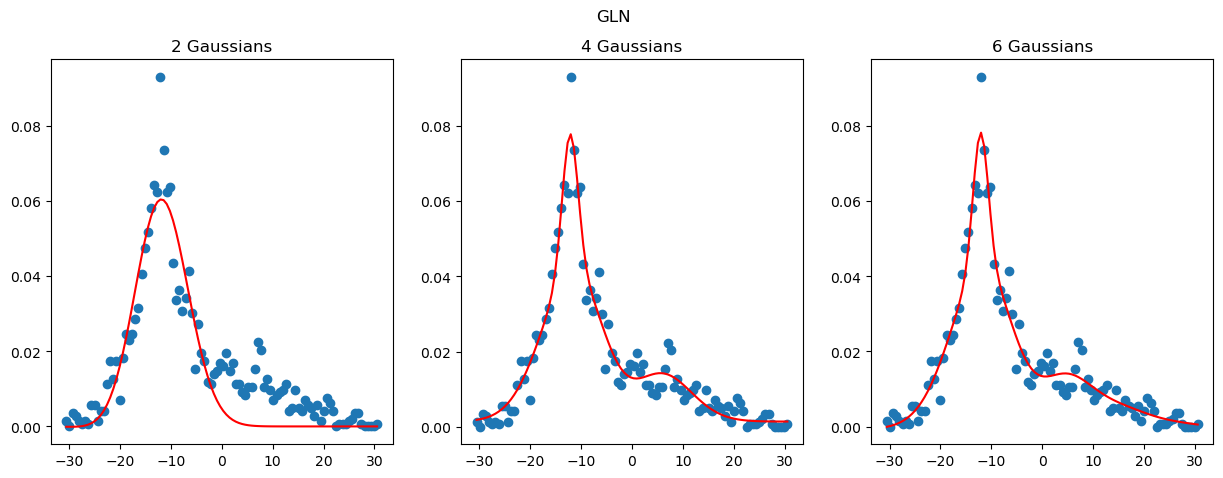

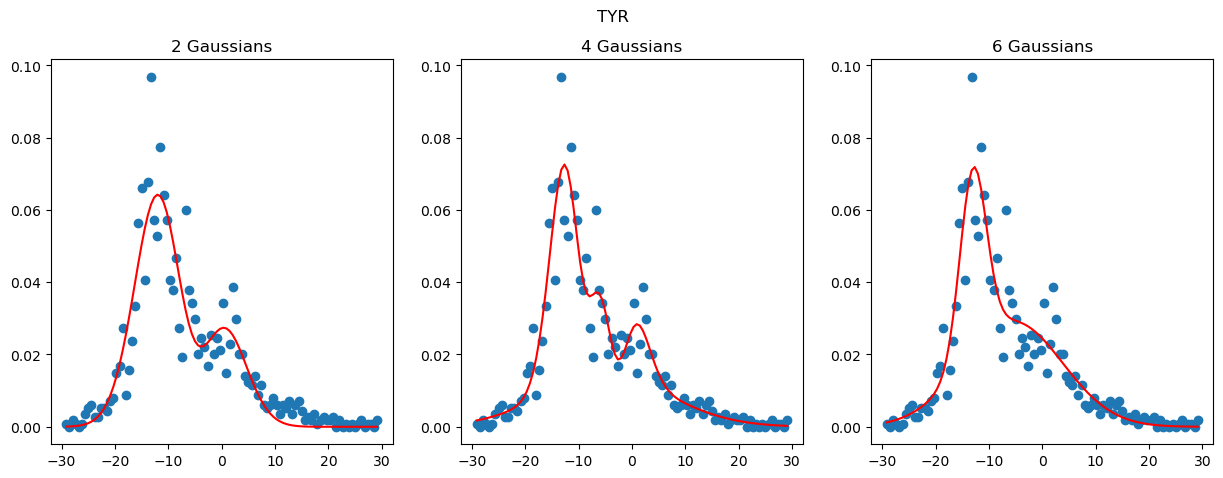

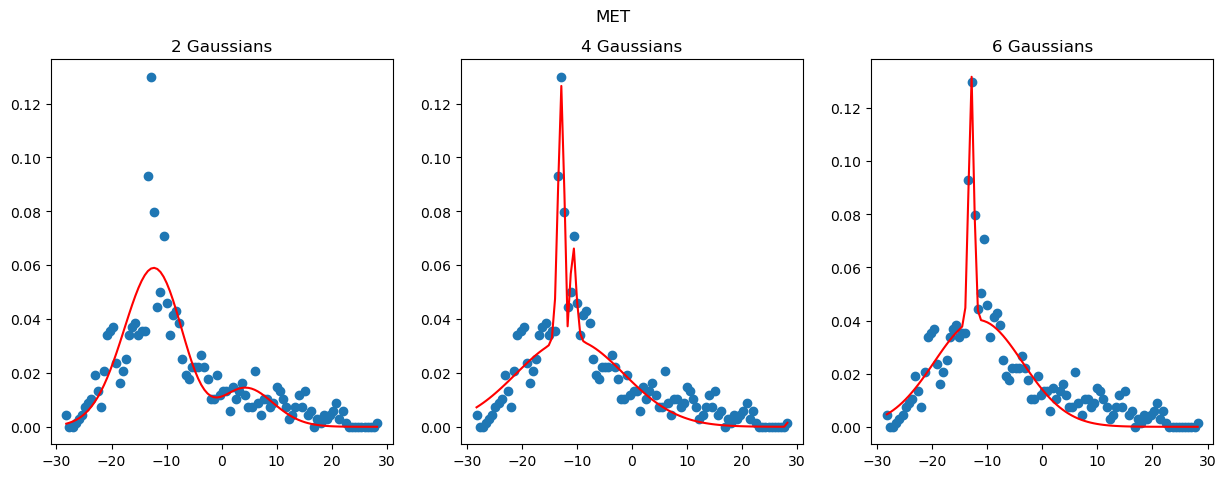

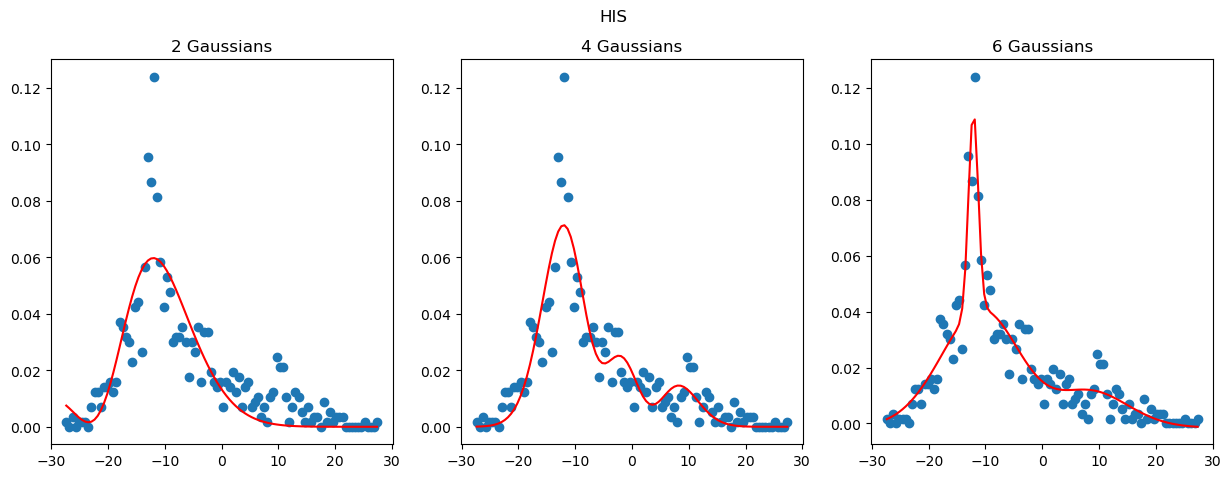

In [56]:
#Save all the plots to a pdf
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('bbs_angles.pdf')

for resname in df_bbs ['residue'].unique():
    print(resname)
    bin_centers, U = get_bins_U_norm(df_bbs[df_bbs['residue'] == resname], 100)
    plot = plot_fit(bin_centers, U, p0, plot_title=resname) 
    pp.savefig(plot)

pp.close()

In [57]:
df_sbb = pd.read_csv(os.path.join(angles_folder, 'sbb_angles.csv'))
df_sbb.head()


,angle,residue
0,112.903277,GLU
1,146.635342,PHE
2,85.673875,LYS
3,123.167256,ILE
4,143.943048,LYS


GLU


/var/folders/yb/qgjkd6mj4v73bglk6kjb929m0000gn/T/ipykernel_96457/3318043070.py:2: RuntimeWarning: divide by zero encountered in log
  return -2.494 * np.log(density)
/Users/marvinprakash/anaconda3/envs/bio/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


PHE
LYS
ILE
ARG
HIS
TRP
GLN
TYR
MET


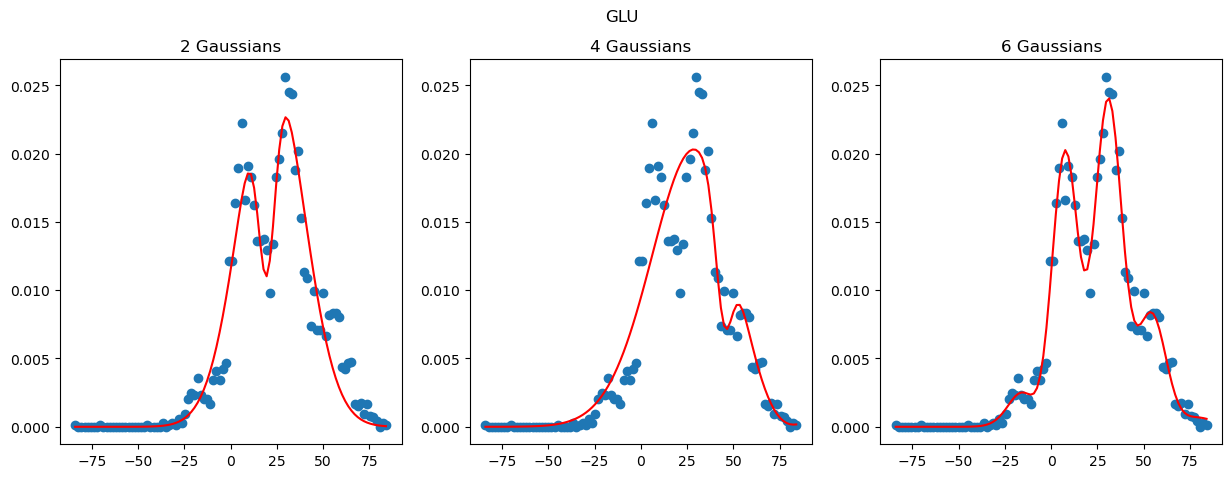

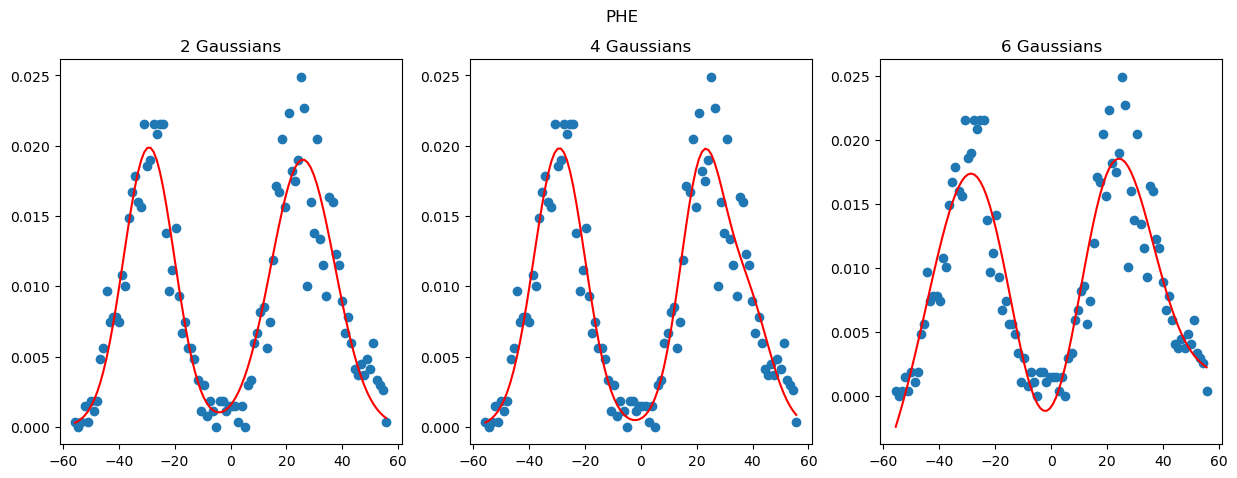

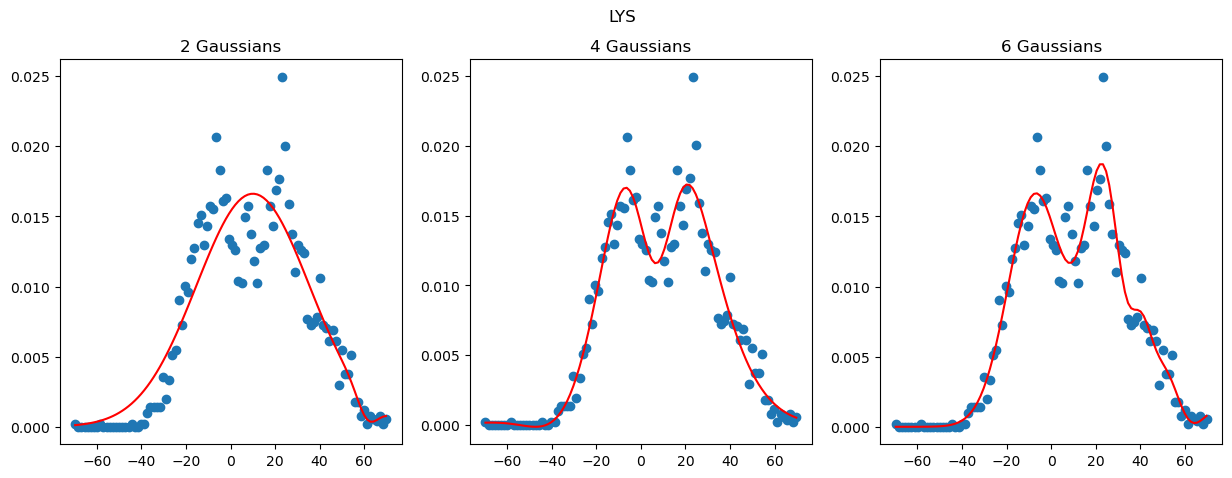

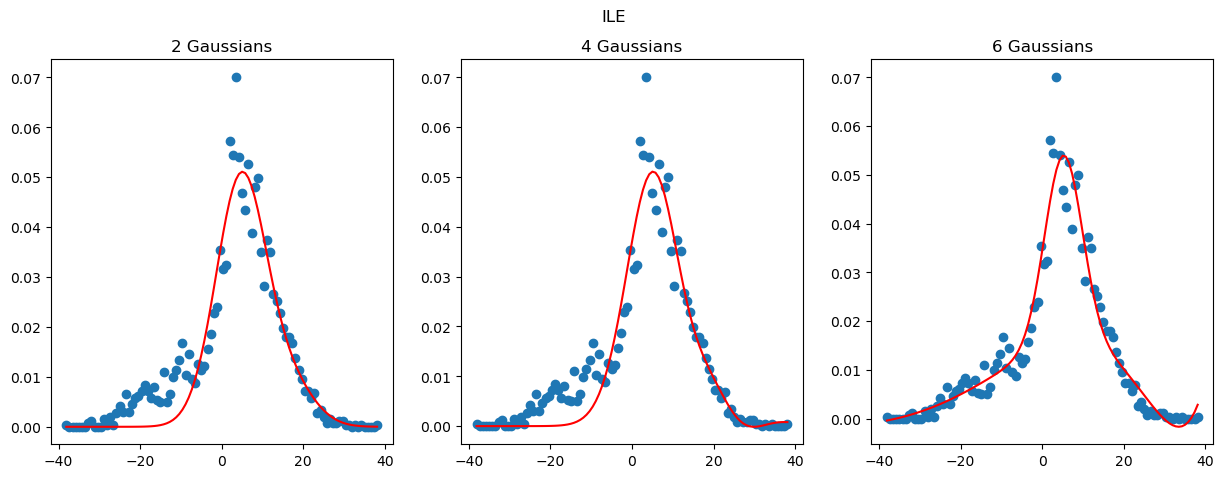

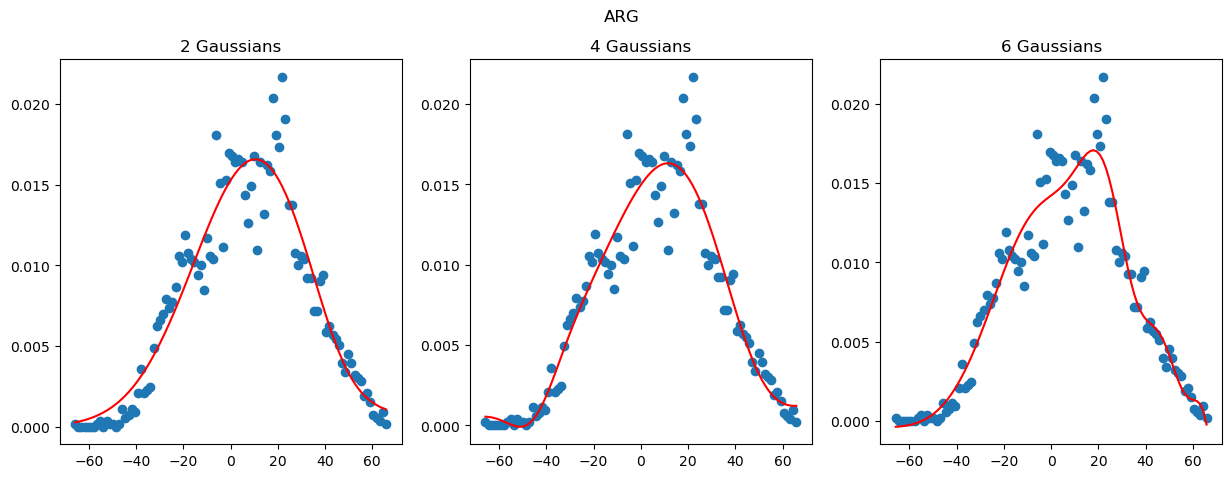

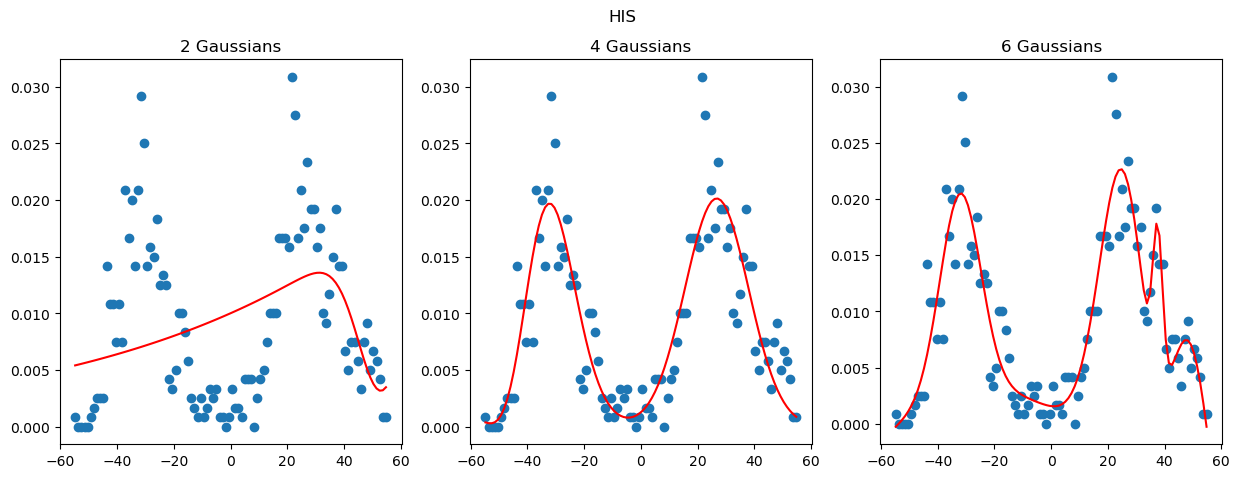

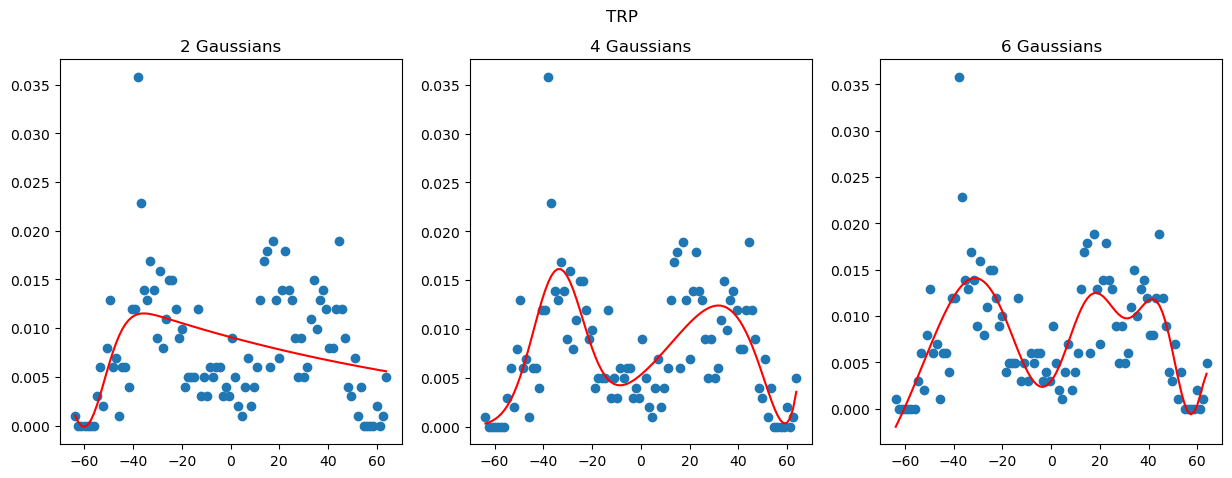

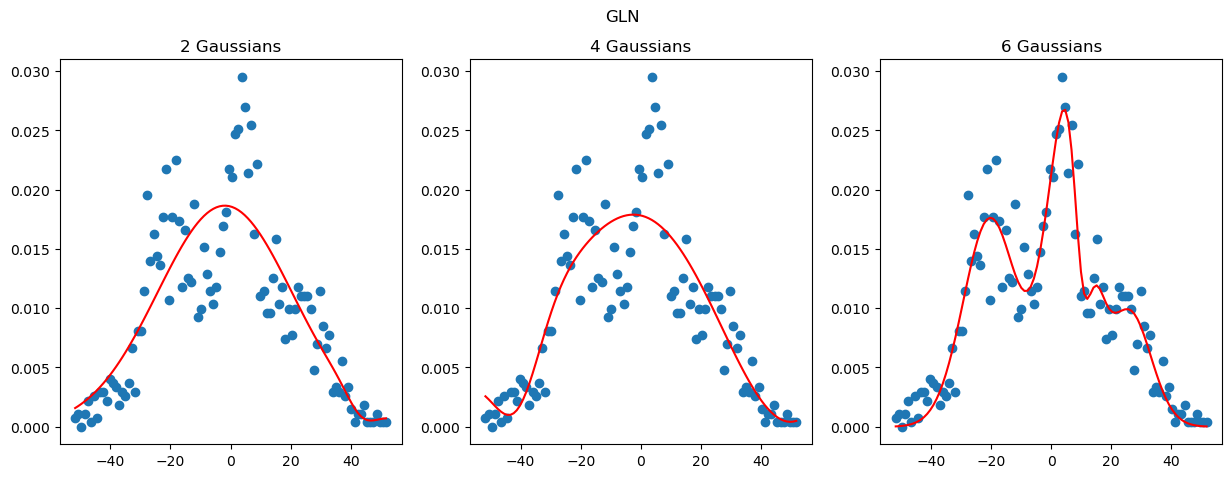

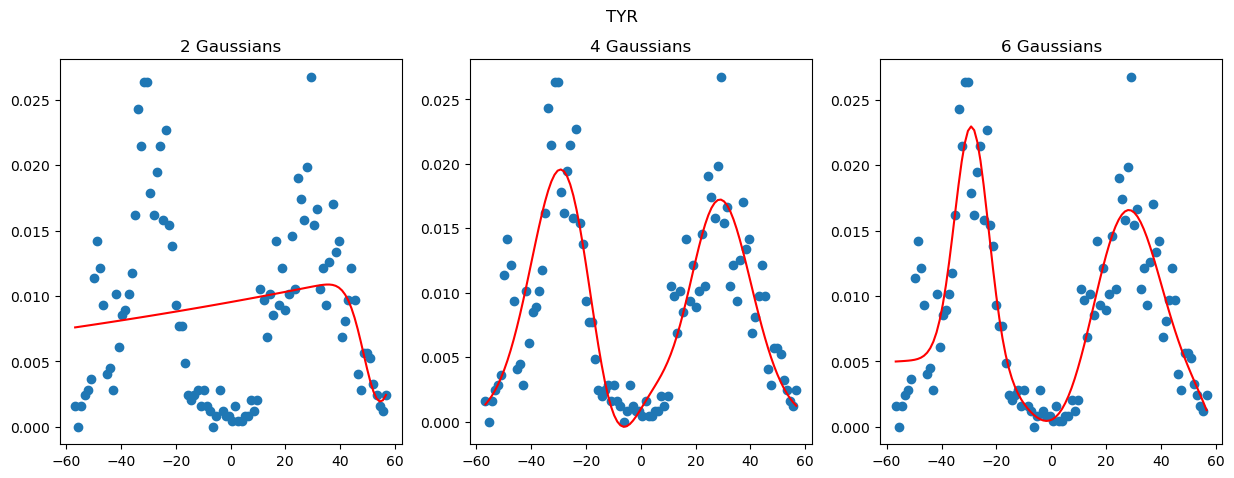

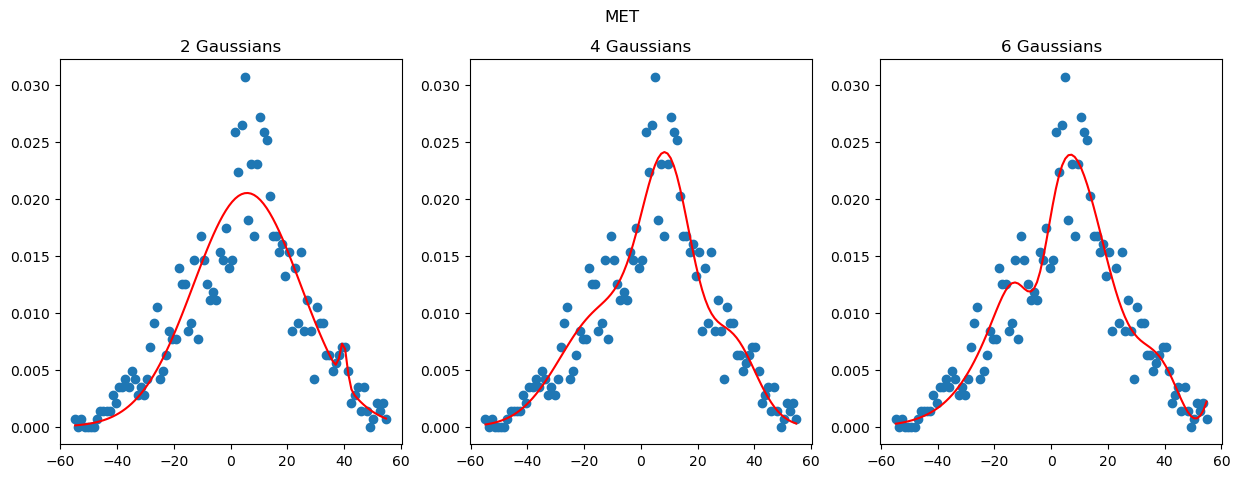

In [58]:
# Save all the plots to a pdf
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('sbb_angles.pdf')

for resname in df_sbb ['residue'].unique():
    print(resname)
    bin_centers, U = get_bins_U_norm(df_sbb[df_sbb['residue'] == resname], 100)
    plot = plot_fit(bin_centers, U, p0, plot_title=resname) 
    pp.savefig(plot)

pp.close()

/var/folders/yb/qgjkd6mj4v73bglk6kjb929m0000gn/T/ipykernel_96457/3318043070.py:2: RuntimeWarning: divide by zero encountered in log
  return -2.494 * np.log(density)
/Users/marvinprakash/anaconda3/envs/bio/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


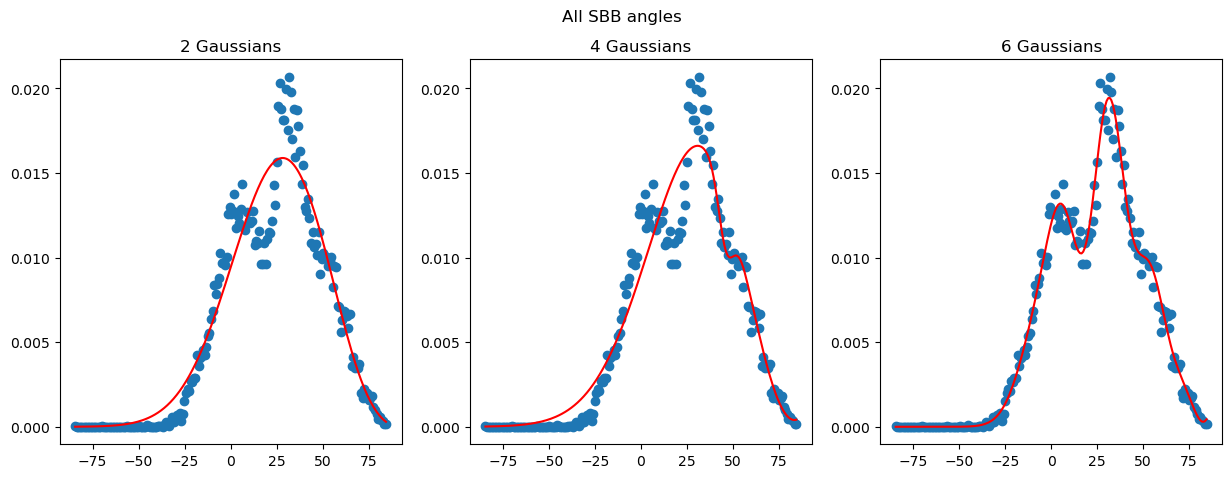

In [65]:
bin_centers, U = get_bins_U_norm(df_sbb, 200)
plot = plot_fit(bin_centers, U, p0) 
plt.suptitle("All SBB angles")
plt.show()

/var/folders/yb/qgjkd6mj4v73bglk6kjb929m0000gn/T/ipykernel_96457/3318043070.py:2: RuntimeWarning: divide by zero encountered in log
  return -2.494 * np.log(density)


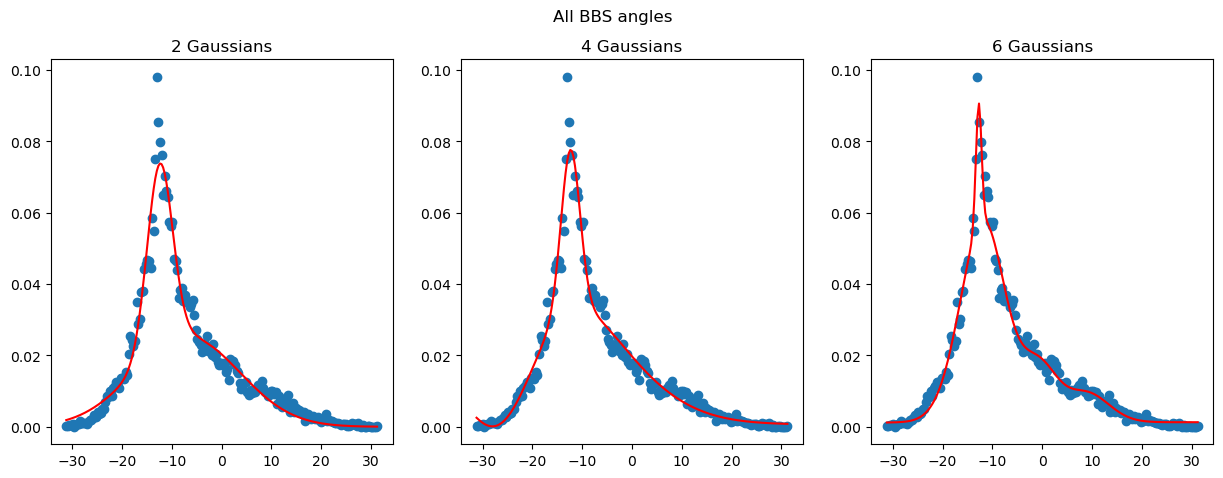

In [66]:
bin_centers, U = get_bins_U_norm(df_bbs, 200)
plot = plot_fit(bin_centers, U, p0)
plt.suptitle("All BBS angles")
plt.show()

In [ ]:
# Get the best fit among  2, 4, 6 gaussians using RMSE

# Average sp ps sb distances
# 

In [ ]:
from scipy.stats import models

aic2 = models.regression.aic(U, func2(bin_centers, *popt2), 6)